In [104]:
import pandas as pd
import numpy as np
from skimpy import skim

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

import requests
from PIL import Image
from io import BytesIO 

import ray
import optuna
from multiprocessing import Pool, get_context
from multiprocessing.pool import ThreadPool

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Dropout


In [9]:
class UberVision:

    # global path variable
    data_connection = '/uber_eats/restaurants.csv'
    author = 'Ben Stager, 2024'

    def __init__(self) -> None:
        return

    # load csv into memory
    def load_data(self, cols=''):  
        self.cols = cols 
        if cols == '':
            return pd.read_csv(UberVision.data_connection)

    def load_image(self, url_arr):
        self.url_arr = url_arr
        
        if url_arr is list():
            self.url_arr = url_arr
            images = []
            print(url_arr)

            for url in url_arr:
                response = requests.get(url)
                img = Image.open(BytesIO(response.content))
                images.append(img)

            return images
        
        self.url_arr = url_arr
        images = []
        print(url_arr)
    
    def extract_feature(self, img):
        self.img_arr = img

        resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        features_img = resnet.predict(img_array)[0]

        return features_img
    
    
    def prepare_extract_features(self, img_arr):

        self.img_arr = img_arr
        features = []

        resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

        for img in img_arr:
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            features_img = resnet.predict(img_array)

            features.extend(features_img[0])

        return features
    
    def UberBaseline():
        
    def UberXGBoost():
        pass

    def UberRandomForest():

    def UberBaseline():

In [44]:
class MarketModel():

    default_model_list = ['baseline', 'log_reg', 'rf', 'xgb', 'nn']
    
    def __init__(self, models = 'baseline'):
        self.models = models

In [10]:
def load_image(url_arr):
    images = []
    print(url_arr)

    for url in url_arr:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        images.append(img)

    return images

In [11]:
def prepare_extract_features(img_arr):
    features = []

    resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    for img in img_arr:
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        features_img = resnet.predict(img_array)

        features.extend(features_img[0])

    return features

In [12]:
img_cols = []
img_cols.append('loc_no_address')
img_cols.append('loc_name')
[img_cols.append(f'img{i}') for i in range(1,6)]
img_cols.append('review_rating')

df = pd.read_csv('Ubereat_US_Merchant.csv')
df['loc_name'] = df['loc_name'].apply(lambda x: x.lstrip())
df['loc_name'] = df['loc_name'].apply(lambda x: x.rstrip())
df = df.dropna(subset=img_cols[2:7])
df['loc_no_address'] = df['loc_name'].apply(lambda x: x.split('(')[0])

df = df[img_cols]

df = df.groupby('loc_no_address').agg({'img1':'first','img2':'first','img3':'first','img4':'first','img5':'first','review_rating':'mean'}).reset_index()

df_labeled = df[df['review_rating'].isna() == False]
df_unlabeled = df[df['review_rating'].isna() == True]

In [140]:
img_cols = [url for url in df_labeled.iloc[0][['img1','img2','img3','img4','img4']].values]

In [170]:
loaded_images = []
design_matrix = []

for idx in range(df_labeled.shape[0]):
    img_cols = [url for url in df_labeled.iloc[idx][['img1','img2','img3','img4','img4']].values]
    images = load_image(img_cols)

    extracted_features = prepare_extract_features(images)
    design_matrix.append(extracted_features)

['https://d1ralsognjng37.cloudfront.net/8a8f9fac-3d8b-4d52-bfc6-dfdcede9f1c3.jpeg', 'https://d1ralsognjng37.cloudfront.net/565b7132-7a47-4594-8d1b-c5106a33e902.jpeg', 'https://d1ralsognjng37.cloudfront.net/9089e663-f58f-4fd5-955c-fe321a7f1877.jpeg', 'https://d1ralsognjng37.cloudfront.net/f14d9c8d-2afe-48e8-a777-c261c3a8984d.jpeg', 'https://d1ralsognjng37.cloudfront.net/f14d9c8d-2afe-48e8-a777-c261c3a8984d.jpeg']
1/1 [==============================] - 0s 312ms/step
['https://d1ralsognjng37.cloudfront.net/f143b026-3c9f-40b9-963a-bd7eb432e18c.jpeg', 'https://d1ralsognjng37.cloudfront.net/dd01cf1b-23b0-4057-b072-fdf1e8fd12f6.jpeg', 'https://d1ralsognjng37.cloudfront.net/b61eb494-eeee-4c66-856c-9731b236ee30.jpeg', 'https://d1ralsognjng37.cloudfront.net/26c43205-bbe8-4777-909c-9d39fc258b2b.jpeg', 'https://d1ralsognjng37.cloudfront.net/26c43205-bbe8-4777-909c-9d39fc258b2b.jpeg']
1/1 [==============================] - 0s 310ms/step
['https://d1ralsognjng37.cloudfront.net/9a1f5119-3ce1-43d1-9ec

In [174]:
design_matrix.to_csv('design_matrix.csv')

AttributeError: 'list' object has no attribute 'to_csv'

In [177]:
pd.DataFrame(design_matrix).to_csv('design_matrix.csv')

In [13]:
features = pd.read_csv('design_matrix.csv')

df_training = pd.concat([df_labeled.reset_index().drop('index',axis=1), features.reset_index().drop(['index', 'Unnamed: 0'],axis=1)],axis=1)

one = df_training.drop('review_rating',axis=1)
two = df_training['review_rating']

df_training = pd.concat([one,two],axis=1)
df_training_X = df_training.drop(['loc_no_address', 'review_rating', 'img1', 'img2', 'img3', 'img4', 'img5'],axis=1)
df_training_y = df_training['review_rating']

In [14]:
pca = PCA()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_training_X, df_training_y, test_size=.25)

# baseline

In [65]:
y_preds_baseline = np.round(np.tile(np.average(y_train), y_test.shape[0]),1)
mean_squared_error(y_test, y_preds_baseline)

0.07502356505102042

# SLR

In [100]:
model = LinearRegression()
model.fit(pca.fit_transform(X_train)[:,:2], y_train)
y_preds = model.predict(pca.fit_transform(X_test)[:,:2])

In [102]:
mean_squared_error(y_test, y_preds)

0.24467521068582002

In [33]:
df_training.columns

Index(['loc_no_address', 'img1', 'img2', 'img3', 'img4', 'img5', '0', '1', '2',
       '3',
       ...
       '10231', '10232', '10233', '10234', '10235', '10236', '10237', '10238',
       '10239', 'review_rating'],
      dtype='object', length=10247)

# randomforest regression

In [53]:
np.round(y_preds_baseline, 1)

array([4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5])

In [60]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),          
        'max_depth': trial.suggest_int('max_depth', 10, 100, step=1),            
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=1),  
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 4, step=1),      
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])    
    }

    model = RandomForestRegressor(**params)
    model.fit(pca.fit_transform(X_train)[:,:3], y_train)
    y_preds_RF = np.round(model.predict(pca.fit_transform(X_test)[:,:3]), 1)

    error = mean_squared_error(y_test, y_preds_RF)

    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

model = RandomForestRegressor(**study.best_params)

model.fit(pca.fit_transform(X_train)[:,:3], y_train)
y_preds_RF = np.round(model.predict(pca.fit_transform(X_test)[:,:3]),1)

error_RF = mean_squared_error(y_test, y_preds_RF)

[I 2024-10-17 22:50:10,174] A new study created in memory with name: no-name-6f957260-6f0a-44b4-9718-568dc2ce40e1
[I 2024-10-17 22:50:11,256] Trial 0 finished with value: 0.10050273171768702 and parameters: {'n_estimators': 98, 'max_depth': 62, 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.10050273171768702.
[I 2024-10-17 22:50:12,164] Trial 1 finished with value: 0.14464707695578224 and parameters: {'n_estimators': 67, 'max_depth': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 0.10050273171768702.
[I 2024-10-17 22:50:13,002] Trial 2 finished with value: 0.09178398171768704 and parameters: {'n_estimators': 147, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 2 with value: 0.09178398171768704.
[I 2024-10-17 22:50:13,891] Trial 3 finished with value: 0.10154439838435371 and parameters: {'n_estimators': 188, 'max_depth': 30, 'min_sampl

In [63]:
error_RF = mean_squared_error(y_test, y_preds_RF)

In [64]:
error_RF

0.09362921981292514

In [ ]:
RandomForestRegressor()

# XGB classifier

In [ ]:
StandardScaler().fit

In [40]:
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 0.95, 0.05),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.6, 0.95, 0.05),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100)
    }

    model = XGBRegressor(**params)
    model.fit(pca.fit_transform(X_train)[:,:7], y_train)
    y_preds_XGB = model.predict(pca.fit_transform(X_test)[:,:7])

    error = mean_squared_error(y_test, y_preds_XGB)

    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

model = XGBRegressor(**study.best_params)
model.fit(pca.fit_transform(X_train)[:,:7], y_train)

y_preds_XGB = model.predict(pca.fit_transform(X_test)[:,:7])
error = mean_squared_error(y_test, y_preds_XGB)

[I 2024-10-17 15:06:39,771] A new study created in memory with name: no-name-a253da8c-da56-4cf8-b050-da30a6a71215
/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/3786071214.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/3786071214.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/3786071214.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

In [62]:
error

0.07414454287469988

In [41]:
error

0.07414454287469988

In [32]:
error = mean_squared_error(y_test, y_preds_XGB)

In [33]:
error_baseline = mean_squared_error(y_test, y_preds_baseline)

In [42]:
np.abs((error - error_baseline))/error_baseline

0.016959129585730322

In [43]:
error_baseline

0.0754236625415728

In [25]:
y_preds_XGB = model.predict(pca.fit_transform(X_test)[:,:3])
error = mean_absolute_error(y_test, y_preds_XGB)

In [26]:
error

0.21249116507314497

# neural network ?

In [110]:
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

model.fit(pca.fit_transform(X_train)[:,:4], y_train, epochs=250)

y_preds_MLP = np.round(model.predict(pca.fit_transform(X_test)[:,:4]),1)
error = mean_squared_error(y_test, y_preds_MLP)

Epoch 1/250
6/6 [==============================] - 0s 1ms/step - loss: 23.4260
Epoch 2/250
6/6 [==============================] - 0s 687us/step - loss: 12.5956
Epoch 3/250
6/6 [==============================] - 0s 891us/step - loss: 7.1562
Epoch 4/250
6/6 [==============================] - 0s 718us/step - loss: 9.5345
Epoch 5/250
6/6 [==============================] - 0s 1ms/step - loss: 6.9649
Epoch 6/250
6/6 [==============================] - 0s 724us/step - loss: 6.7570
Epoch 7/250
6/6 [==============================] - 0s 973us/step - loss: 5.4153
Epoch 8/250
6/6 [==============================] - 0s 655us/step - loss: 6.2275
Epoch 9/250
6/6 [==============================] - 0s 945us/step - loss: 5.0827
Epoch 10/250
6/6 [==============================] - 0s 697us/step - loss: 5.0539
Epoch 11/250
6/6 [==============================] - 0s 639us/step - loss: 5.2016
Epoch 12/250
6/6 [==============================] - 0s 995us/step - loss: 4.2028
Epoch 13/250
6/6 [=====================

In [111]:
error

0.17447601696559867

In [85]:
error

1.240452224959869

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='review_rating', ylabel='Count'>

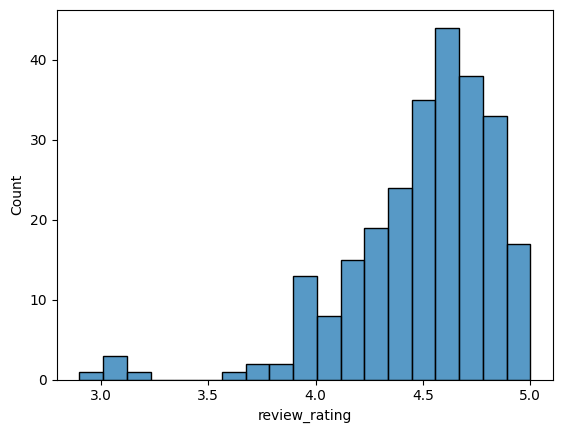

In [28]:
sns.histplot(data=df_training, x='review_rating')